In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wEPNbLIKW3CLTLYxmfkBAbqSZ_8s7h0SzwduPwGtIOV1jm8nojVOwU
Mounted at /content/drive


In [4]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils

In [5]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/Dataset/fer2013.csv')

In [6]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None
   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [7]:
#Defining Training Dataset & Test Dataset Arrays
X_train,train_y,X_test,test_y = [],[],[],[]

In [8]:
for index, row in df.iterrows():
    #Split Pixel Values by space
    val=row['pixels'].split(" ")

    try:
        if 'Training' in row['Usage']:
           #Store Train datasets
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           #Store Test datasets
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

In [9]:
print(f"X_train sample data : {X_train[0:2]}")
print(f"train_y sample data : {train_y[0:2]}")
print(f"X_test sample data : {X_test[0:2]}")
print(f"test_y sample data : {test_y[0:2]}")

X_train sample data : [array([ 70.,  80.,  82., ..., 106., 109.,  82.], dtype=float32), array([151., 150., 147., ..., 193., 183., 184.], dtype=float32)]
train_y sample data : [0, 0]
X_test sample data : [array([254., 254., 254., ...,  42., 129., 180.], dtype=float32), array([156., 184., 198., ..., 172., 167., 161.], dtype=float32)]
test_y sample data : [0, 1]


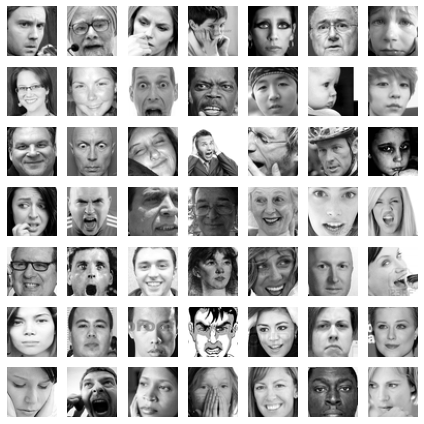

In [10]:
#simple exploration grid of the dataset.
plt.figure(figsize=(6, 6))
for i in range(49):
    plt.subplot(7, 7, i + 1)
    plt.imshow(X_train[i].reshape((48, 48)), cmap="gray")
    plt.axis('off')
    plt.tight_layout()

In [12]:
#hyperparameters
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
num_features = 64
num_labels = 7
batch_size = 64
epochs = 30
width, height = 48, 48

In [13]:
#Converting values to np array for Keras Usage
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

#Coverting Array of labeled data to one hot vector(7x7)
train_y = np_utils.to_categorical(train_y, num_classes = num_labels)
test_y = np_utils.to_categorical(test_y, num_classes = num_labels)

In [14]:
#Normalizing Data
#Subtract Mean Value by Standard Deviation
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

In [15]:
#Reshape Normalized data for Keras Understand
X_train = X_train.reshape(X_train.shape[0],width,height,1)
X_test = X_test.reshape(X_test.shape[0],width,height,1)

In [16]:
#Building Keras CNN (Convolutional Nural Network)

# First 2 Convolutional Layers
model = Sequential()
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

# Second 2 Convolutional Layers
model.add(Conv2D(num_features, (3,3), activation='relu'))
model.add(Conv2D(num_features, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

# Third 2 Convolutional Layers
model.add(Conv2D(2*num_features, (3,3), activation='relu'))
model.add(Conv2D(2*num_features, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

In [17]:
model.add(Flatten())
model.add(Dense(2*2*2*2*num_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0

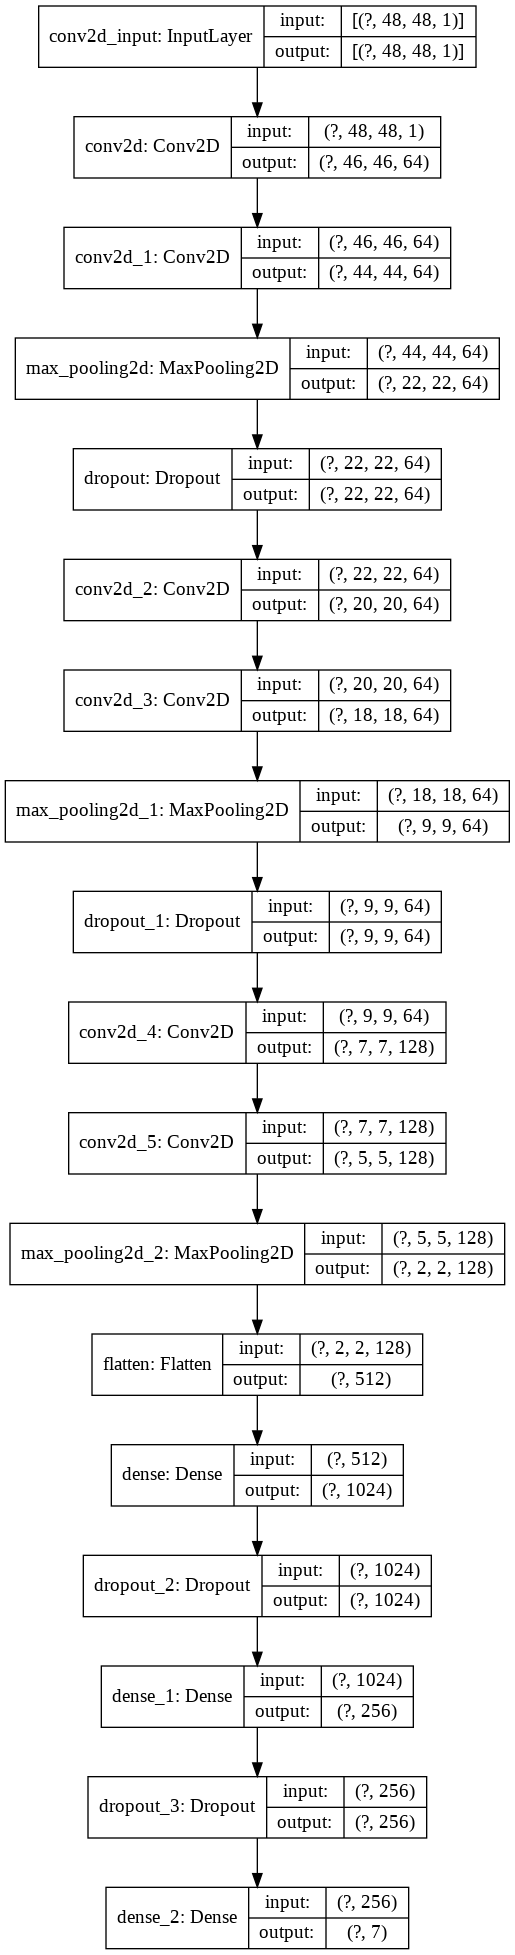

In [19]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
#Compliling the model
model.compile(loss = categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [21]:
#Training the model
history = model.fit(
    X_train, train_y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, test_y),
    shuffle=True
)


Epoch 1/30
449/449 [==============================] - 515s 1s/step - loss: 1.7539 - accuracy: 0.2789 - val_loss: 1.6719 - val_accuracy: 0.3502
Epoch 2/30
449/449 [==============================] - 517s 1s/step - loss: 1.5367 - accuracy: 0.3954 - val_loss: 1.4127 - val_accuracy: 0.4517
Epoch 3/30
449/449 [==============================] - 515s 1s/step - loss: 1.4089 - accuracy: 0.4558 - val_loss: 1.3228 - val_accuracy: 0.4790
Epoch 4/30
449/449 [==============================] - 514s 1s/step - loss: 1.3503 - accuracy: 0.4781 - val_loss: 1.3258 - val_accuracy: 0.4962
Epoch 5/30
449/449 [==============================] - 508s 1s/step - loss: 1.2923 - accuracy: 0.5079 - val_loss: 1.2828 - val_accuracy: 0.4999
Epoch 6/30
449/449 [==============================] - 511s 1s/step - loss: 1.2544 - accuracy: 0.5188 - val_loss: 1.2196 - val_accuracy: 0.5263
Epoch 7/30
449/449 [==============================] - 512s 1s/step - loss: 1.2278 - accuracy: 0.5279 - val_loss: 1.2164 - val_accuracy: 0.5308

In [22]:
def plot_loss(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's training loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


def plot_accuracy(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model's training accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [ ]:
# Plot loss:
plot_loss(history)

# Plot accuracy:
plot_accuracy(history)

In [24]:
scores = model.evaluate(X_test, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 57.45%


In [ ]:
#Saving the  model to  use it later on
face_json = model.to_json()
with open("Emotions.json", "w") as json_file:
    json_file.write(face_json)
model.save_weights("Emotions.h5")